In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype

In [5]:
data = pd.DataFrame(fetch_covtype(as_frame=True).frame)

data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [6]:
X = data[data.columns[:-1]]
y = data['Cover_Type']

# Классификация без выбора признаков

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [8]:
tree = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
tree_default = tree.fit(X_train, y_train)

In [10]:
tree_default.score(X_test, y_test)

0.9390807466244417

Результат модели (*решающее дерево*) без отбора признаков - 0.939

# Отбор признаков
## Корреляция

<AxesSubplot:>

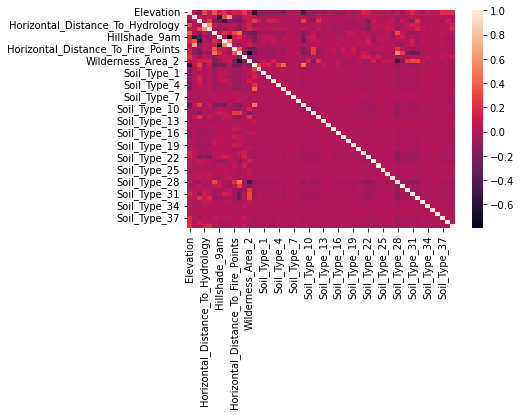

In [105]:
corr = data[data.columns[:-1]].corr()
sns.heatmap(corr)

In [106]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if 0.7 < np.abs(corr.iloc[i,j]) < 1:
            print('{}-{}: {}'.format(corr.iloc[[i],[j]].columns[0], corr.iloc[[i],[j]].index[0], corr.iloc[i,j]))

Hillshade_3pm-Hillshade_9am: -0.7802959522807976
Hillshade_9am-Hillshade_3pm: -0.7802959522807976
Wilderness_Area_2-Wilderness_Area_0: -0.7935926588275815
Wilderness_Area_0-Wilderness_Area_2: -0.7935926588275815


Как видно, есть признаки с относительно высокой (по модулю) корреляцией:
1. **Hillshade_3pm** и **Hillshade_9am**
2. **Wilderness_Area_0** и **Wilderness_Area_2**
***
Можно попробовать удалить по одному из этой пары признаков

In [107]:
X_corr = data.drop(columns=['Hillshade_3pm','Wilderness_Area_0','Cover_Type'])

X_train, X_test, y_train, y_test = train_test_split(X_corr, y, test_size=0.2, random_state=42)

In [108]:
tree_corr = tree.fit(X_train, y_train)

In [109]:
tree_corr.score(X_test, y_test)

0.939192619811881

Удаление двух коррелирующих признаков не дало существенного изменения качества работы модели.

## Feature Importance

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
forest = RandomForestClassifier().fit(X_train, y_train)

In [148]:
forest_importance = pd.Series(forest.feature_importances_, index=X.columns).sort_values()
X_fi = X
scores = []
for n, i in enumerate(forest_importance[:-1]):
    X_fi = X_fi.drop(columns=forest_importance.iloc[[n]].index[0])
    X_train, X_test, y_train, y_test = train_test_split(X_fi, y, test_size=0.2, random_state=42)
    tree_fi = tree.fit(X_train, y_train)
    scores.append(tree_fi.score(X_test,y_test))

[0.9390721409946386, 0.939235647960896, 0.9389086340283813, 0.9383664793507913, 0.9388570002495633, 0.9381169160865038, 0.9388053664707452, 0.9388225777303512, 0.9388053664707452, 0.9389602678071994, 0.9393389155185322, 0.9389000283985783, 0.9388828171389724, 0.9388742115091693, 0.9388397889899572, 0.9385558032064577, 0.9382546061633521, 0.9385385919468516, 0.9379964372692615, 0.9383578737209882, 0.937746874004974, 0.937247747476399, 0.9367916490968392, 0.9362839169384611, 0.9364560295345215, 0.9363785788662943, 0.9355868609244168, 0.934218565785737, 0.9340980869684948, 0.9339862137810556, 0.9325490736039517, 0.9324027778973004, 0.9322822990800582, 0.932170425892619, 0.9319380738879375, 0.9314045248401505, 0.9299845959226526, 0.9290723991635328, 0.928160202404413, 0.9261723019199161, 0.924640499814979, 0.918126038054095, 0.9185218970250337, 0.9172568694439902, 0.9175666721168989, 0.9184100238375945, 0.9198041358656833, 0.9230054301524057, 0.9123688717158766, 0.8957600061960534, 0.81589

In [1]:
plt.figure(figsize=(12, 6))
plt.plot(np.flip(np.arange(1,54)), scores)

plt.title("Feature Importance")
plt.xlabel("Number of features")
plt.ylabel("Model score")
plt.show()

NameError: name 'plt' is not defined

## LDA

In [188]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [200]:
lda_scores = []
for n in range(6): # 6 классов в целевой переменной
    X_lda = LinearDiscriminantAnalysis(n_components=n+1).fit_transform(X,y)
    X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)
    tree_lda = tree.fit(X_train, y_train)
    lda_scores.append(tree_lda.score(X_test,y_test))

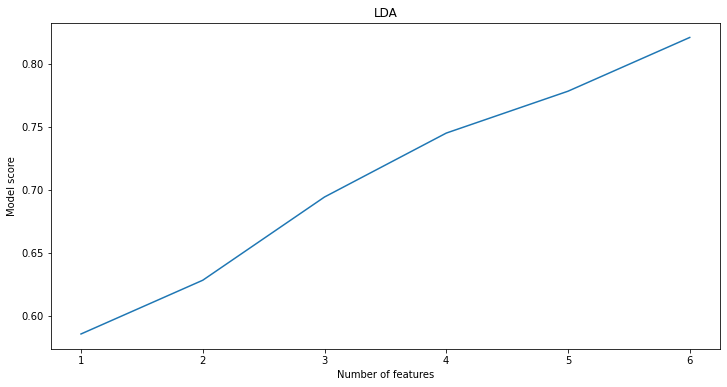

In [201]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1,7), lda_scores)

plt.title('LDA')
plt.xlabel("Number of features")
plt.ylabel("Model score")
plt.show()

## PCA

In [214]:
from sklearn.decomposition import PCA

In [ ]:
pca_scores = []
for n in range(X.shape[1]):
    X_pca = PCA(n_components=n+1).fit_transform(X,y)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    tree_pca = tree.fit(X_train, y_train)
    pca_scores.append(tree.score(X_test,y_test))

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1,54), pca_scores)

plt.title('PCA')
plt.xlabel("Number of features")
plt.ylabel("Model score")
plt.show()